# Jupyter Notebook demo for ETH RDM workshops
The Jupyter Notebook offers an interactive computing environment in which code, documentation and results co-exist in the same place. Jupyter Notebooks can be used with many different programming languages. Here we demonstrate the use of Python and R in the same notebook.

### Import Python modules and load extensions

In [1]:
import urllib
import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imread
from skimage.morphology import remove_small_objects
from skimage.measure import label, regionprops
from skimage.util import invert

%matplotlib inline

In [2]:
%load_ext rpy2.ipython

### Download and read example image

In [3]:
urllib.request.urlretrieve('https://imagej.nih.gov/ij/images/blobs.gif', filename='blobs.gif')

('blobs.gif', <http.client.HTTPMessage at 0x1c1f73ec50>)

In [4]:
img = imread('blobs.gif')

### Plot the example image and it's histogram

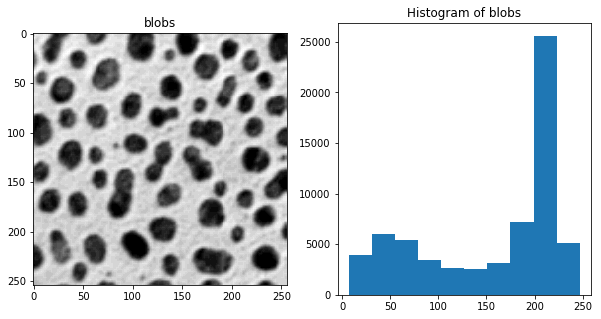

In [5]:
fig = plt.figure(figsize=(10,5))
fig.add_subplot(121)
plt.imshow(img, cmap='gray')
plt.title('blobs')

fig.add_subplot(122)
plt.hist(img.ravel(), bins=10)
plt.title('Histogram of blobs')

plt.show()

### Threshold by image intensity
Based on the intensity histogram, we can define a threshold to binarize the image.

In [6]:
intensity_threshold = 150
binary = img > intensity_threshold
binary = invert(binary)

Text(0.5, 1.0, 'binary')

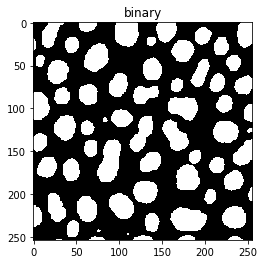

In [7]:
plt.imshow(binary, cmap='gray')
plt.title('binary')

### Remove small objects
There are still some small 'noise' dots left. These can be removed by selecting a size threshold.

In [8]:
filled = remove_small_objects(binary.astype(bool), min_size=30)

Text(0.5, 1.0, 'small objects removed')

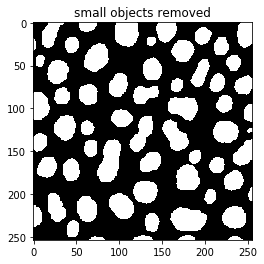

In [9]:
plt.imshow(filled, cmap='gray')
plt.title('small objects removed')

### Label the identified components

In [10]:
label_img = label(filled, connectivity=img.ndim)

Text(0.5, 1.0, 'labeled')

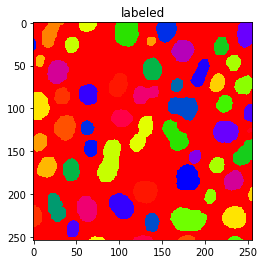

In [11]:
plt.imshow(label_img*10, cmap='prism')
plt.title('labeled')

### Compute the area of each blob, then get the summary statistics in R

In [12]:
props = regionprops(label_img)
area = np.array([x.area for x in props])

In [13]:
%%R -i area
summary(area)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   33.0   221.0   415.0   392.4   537.0   948.0 
